In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv('Daily Household Transactions.csv')
# Display the first few rows of the dataset
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [14]:
# Check columns first
print(df.columns)

# Handle missing values
if 'Category' in df.columns:
    df['Category'].fillna('Unknown', inplace=True)

required_cols = [col for col in ['Date', 'Transaction_ID', 'Amount'] if col in df.columns]
df.dropna(subset=required_cols, inplace=True)

# Convert data types safely
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)


Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_5324\2622401421.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna('Unknown', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_5324\2622401421.py:13: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [15]:
# Verify data types
df.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

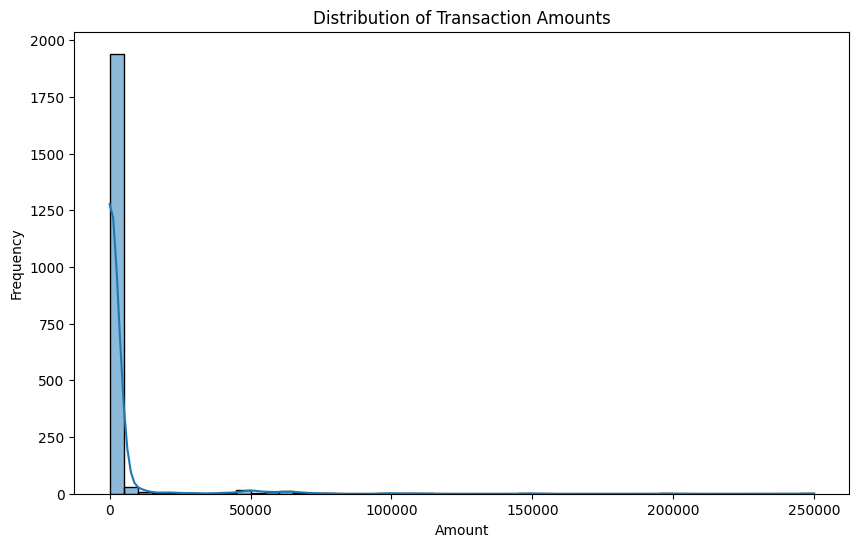

Text(0.5, 1.0, 'Transaction Counts by Category')

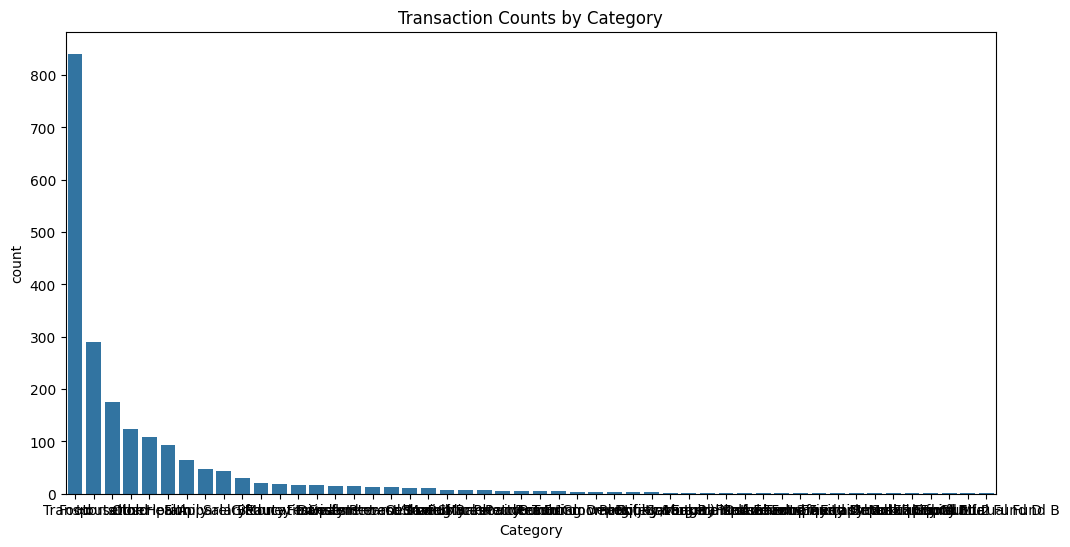

In [16]:
# Summary statistics
df.describe()
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Transaction Counts by Category')

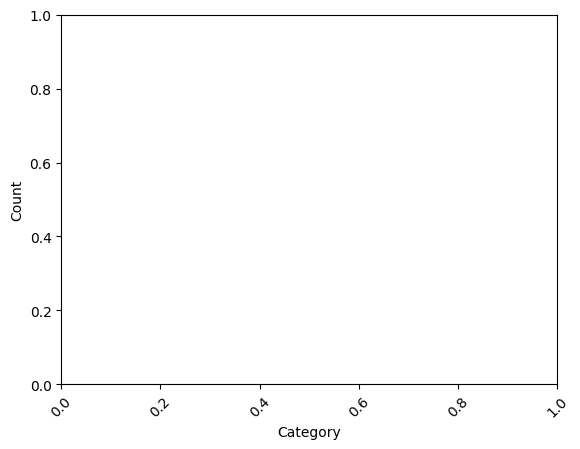

ValueError: Could not interpret value `Type` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [17]:
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Transaction counts by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Transaction Counts by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [18]:
# Check available columns
print("Available columns:", df.columns)

# Use 'Type' only if it exists
if 'Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Type')
    plt.title('Transaction Counts by Type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Type' not found. Try one of:", df.columns)


Available columns: Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')
Column 'Type' not found. Try one of: Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_5324\2052615871.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


Text(0, 0.5, 'Total Amount')

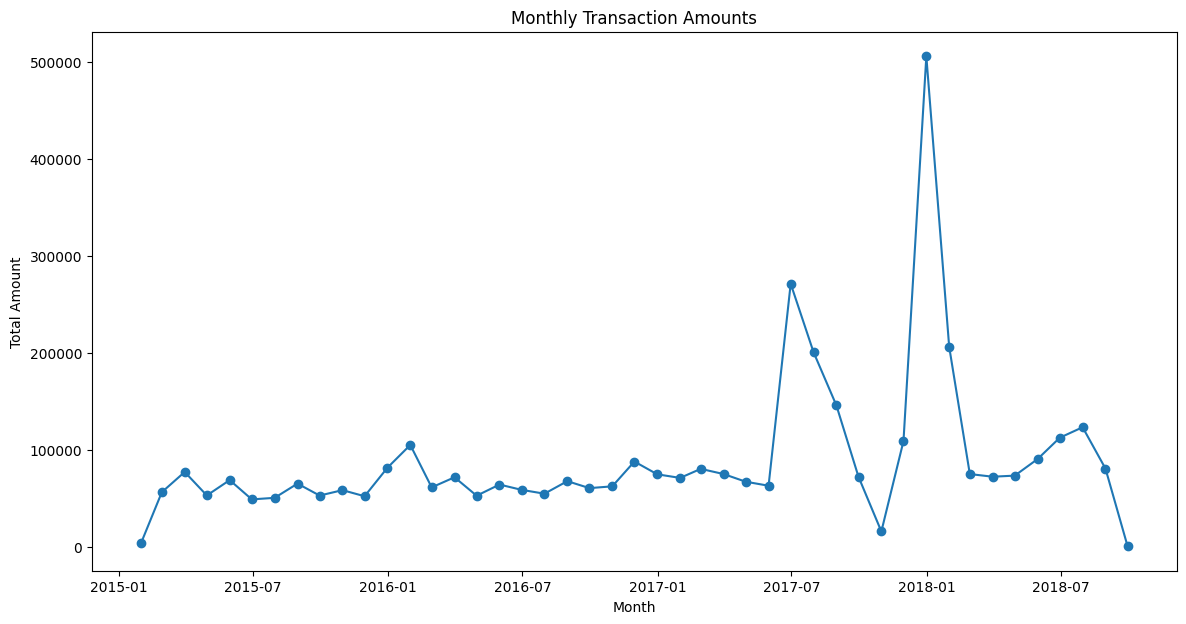

In [19]:
# Resample data to monthly frequency
monthly_data = df.resample('M', on='Date').sum()
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')

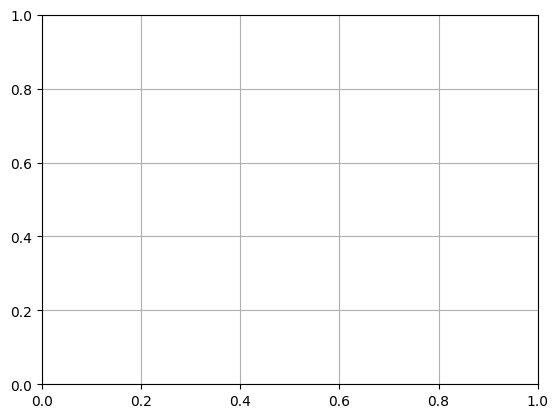

TypeError: datetime64 type does not support sum operations

In [20]:
plt.grid(True)
plt.show()
# Daily trends
daily_data = df.groupby(df['Date'].dt.date).sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

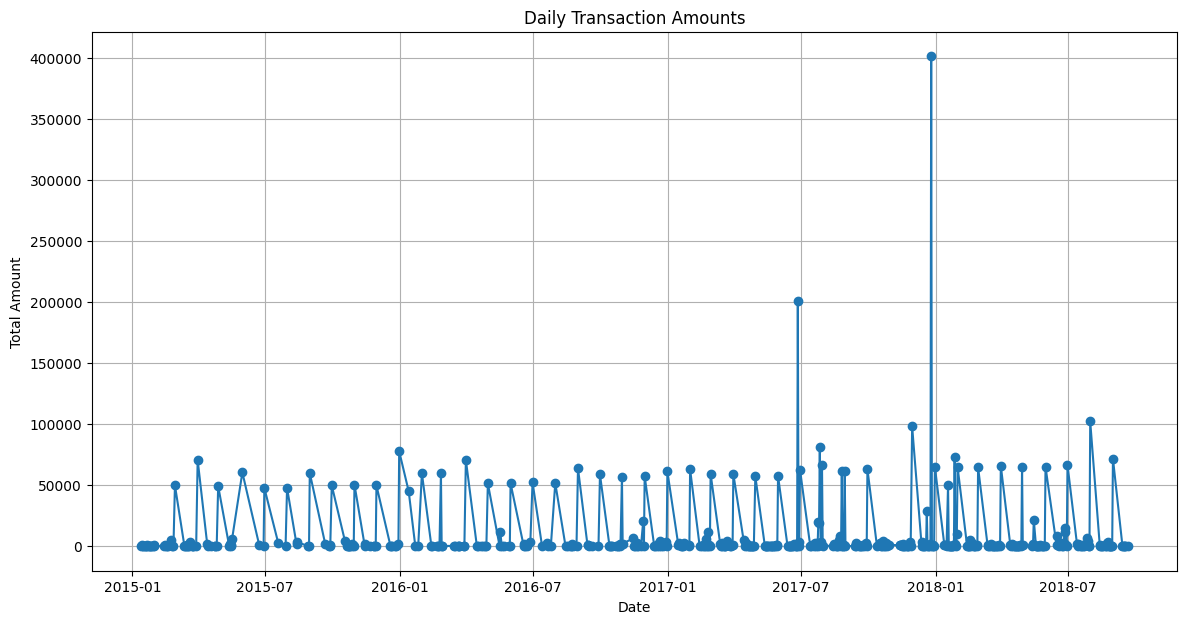

In [21]:
# Daily trends
daily_data = df.groupby(df['Date'].dt.date)['Amount'].sum()

plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data.values, marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


In [23]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
aggfunc='sum', fill_value=0)
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

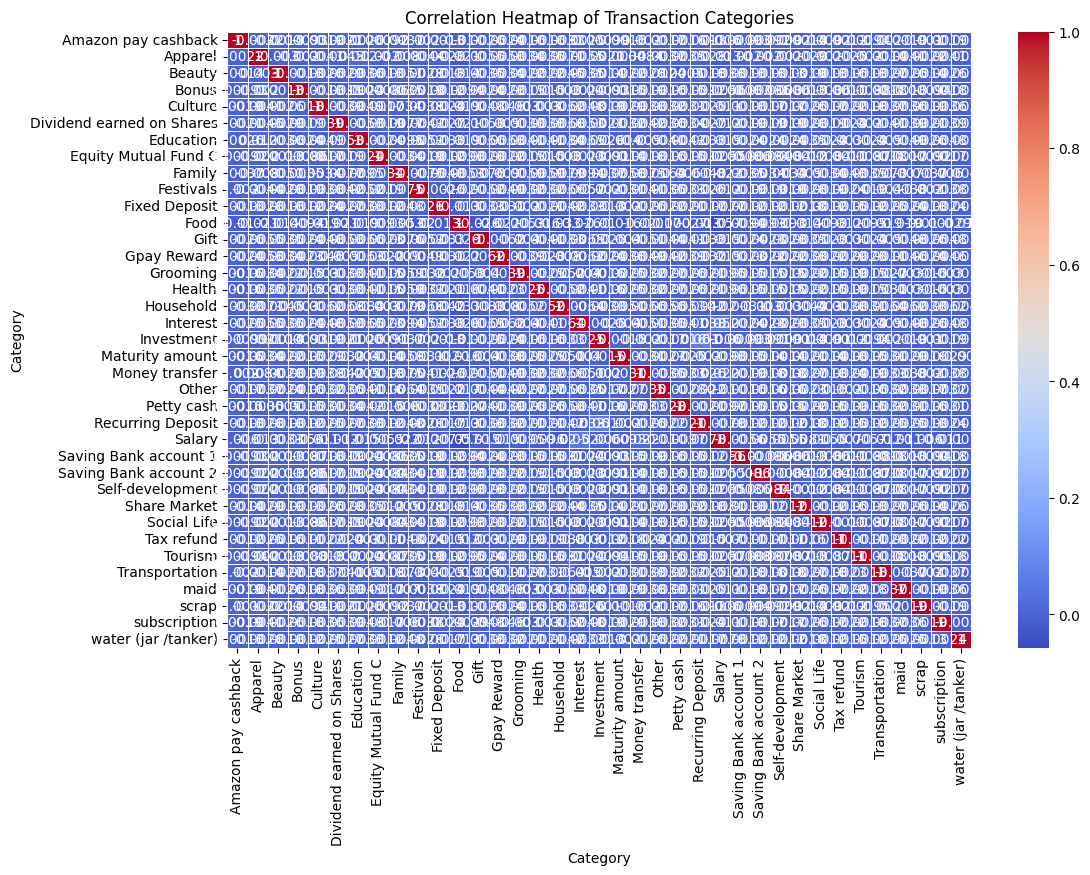

In [24]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()

Summary

The financial transactions dataset was analyzed to identify key trends and insights. The
data cleaning process involved handling missing values, correcting data types, and
removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of
transaction amounts, transaction counts by category and type, and significant patterns
over time. Time series analysis highlighted monthly and daily transaction trends.
Correlation analysis identified relationships between different transaction categories.




Key Findings

● The distribution of transaction amounts showed a right-skewed pattern with most
transactions clustered around lower values.
● Sales and Purchases were the most common transaction categories.
● Credit transactions were more frequent than Debit transactions.
● Monthly transaction trends revealed seasonal patterns with peaks in certain
months.
● Correlation analysis indicated strong relationships between certain transaction
categories.

Visualizations

● Distribution of Transaction Amounts
● Transaction Counts by Category and Type
● Monthly and Daily Transaction Amounts
● Correlation Heatmap of Transaction Categories
This project provides valuable insights into daily financial transactions, helping to
inform decision-making and strategic planning.